## Report 1: Greedy heuristics

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245
* Alicja Kasicka, 148246

In [1]:
from scripts import *

print(get_dist_matrix("../data/TSPA.csv"))

[[  84 2032 2098 ... 4159 3783 1514]
 [1633  483 2398 ... 3349 2266  817]
 [ 720 1419 1462 ... 3640 3149  964]
 ...
 [2782 2371 3641 ... 1461 2908 2554]
 [2558 1440 3302 ... 3060 1309 1773]
 [1234  936 2062 ... 3651 2718  364]]


In [2]:
matrix = get_dist_matrix("../data/TSPA.csv")
sol, cost = random_solution(matrix)
print(sol, cost)

[180 140   0 126 107 156 141   7  34 104  56 191 194  93 149  74 119 122
 174  81 163 111  94 135  48 100  12 136   3  10 103 146 130  26 143 171
  28 138 150 112  40  19 131 139 179  70  18 186  32  63 176 157 199  65
  97 164  99 158 182  16  66  13 188  72  85 125   2  43 134 165 160   4
 198 101 151 178  35  21  47 142  64  37 123  79 197  15  86 152 187 167
  62 129 113 145  69  98 153  95  84  55] 250995


## RANDOM SOLUTION

Pseudocode:


Best cost: 241153
Worst cost: 298242
Mean cost after 200 solutions: 264750.185


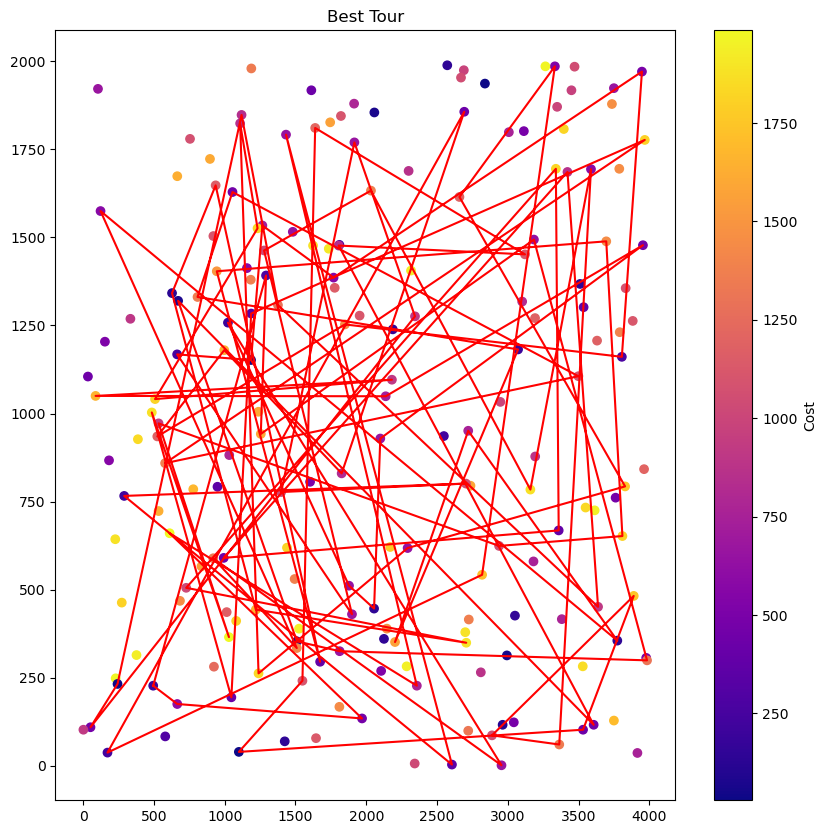

In [3]:
np.random.seed(123)
run_random_exp("../data/TSPA.csv")

Best cost: 240380
Worst cost: 296499
Mean cost after 200 solutions: 266304.945


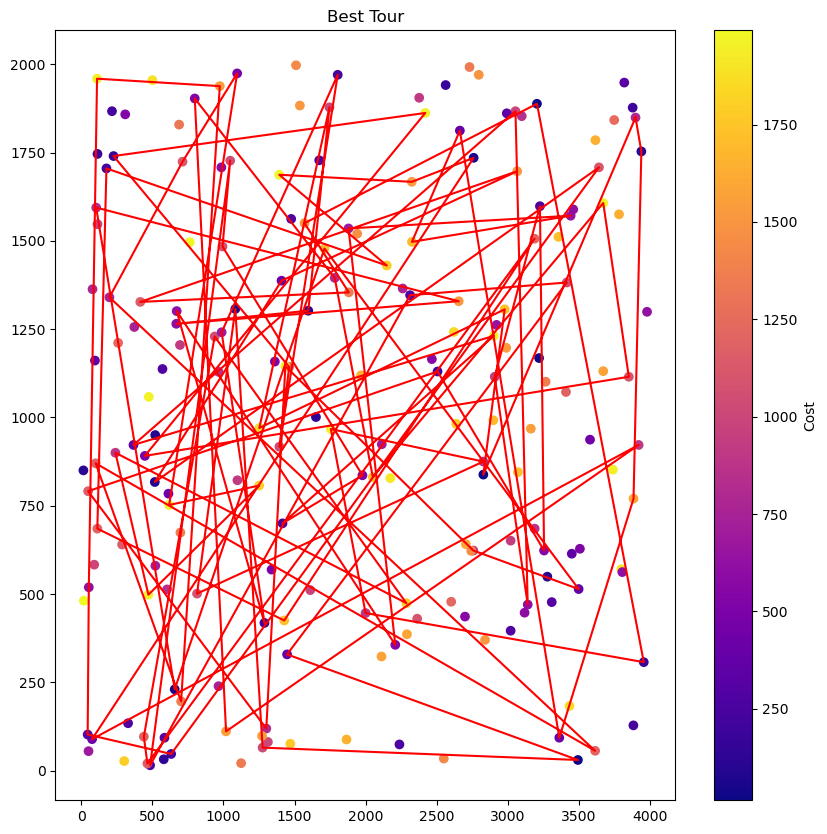

In [4]:
run_random_exp("../data/TSPB.csv")

Best cost: 188548
Worst cost: 239747
Mean cost after 200 solutions: 214950.675


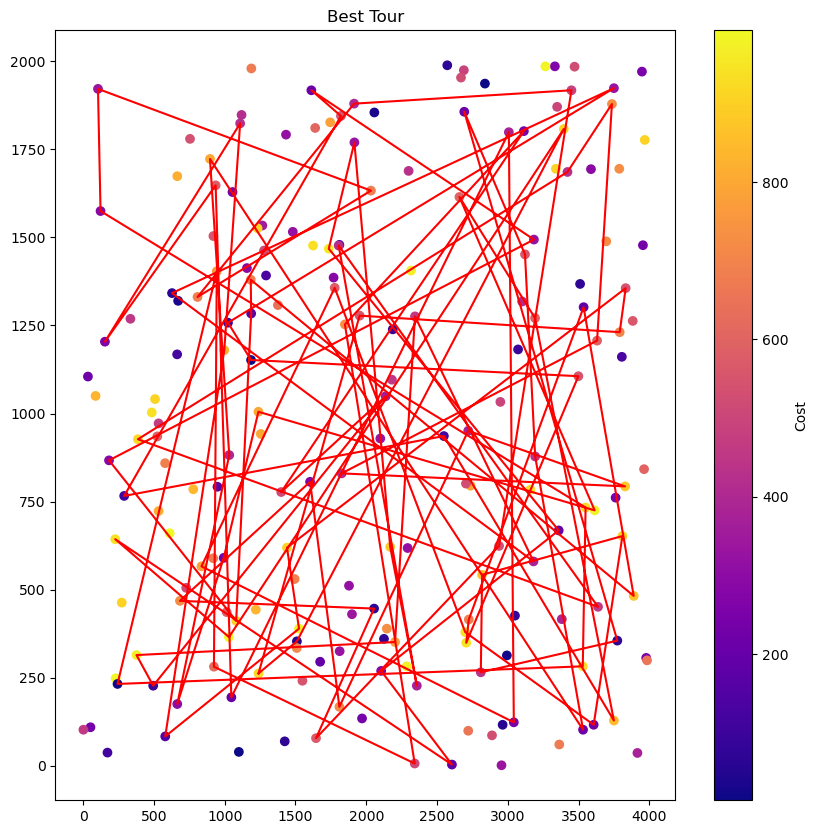

In [5]:
run_random_exp("../data/TSPC.csv")

Best cost: 194917
Worst cost: 246170
Mean cost after 200 solutions: 218555.1


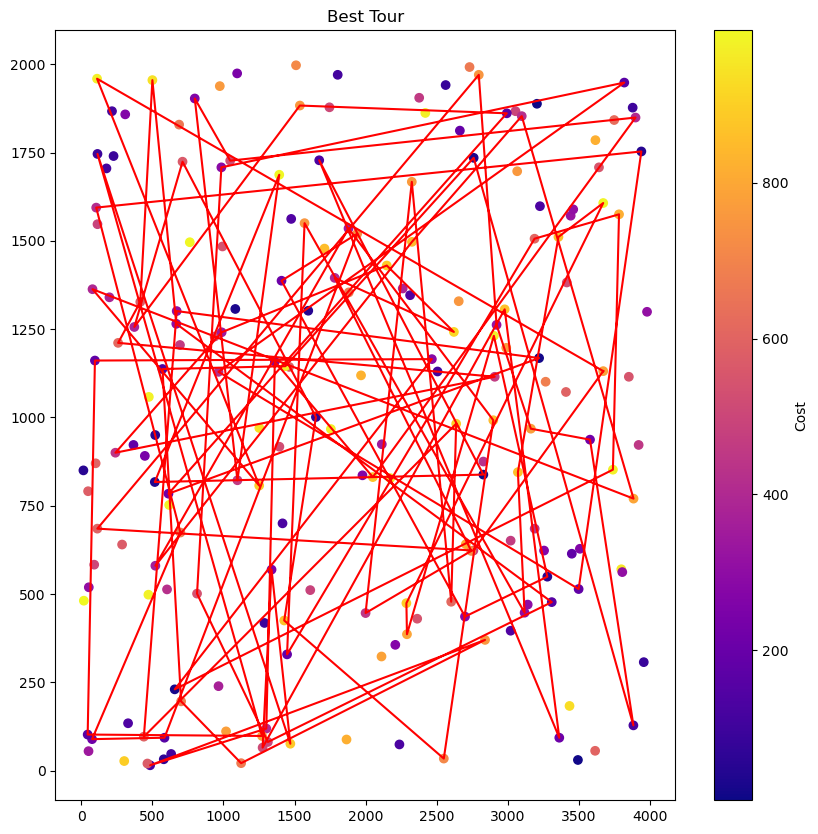

In [6]:
run_random_exp("../data/TSPD.csv")

## NEAREST NEIGHBOUR

## GREEEDY CYCLE

## CONCLUSIONS:
1. 
2. 
3.
